Git-H

In [1]:
import numpy as np
import pandas as pd
from keras.datasets import imdb
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# load the dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data()
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

In [3]:
# Summarize number of words
print("Number of words: ")
print(len(np.unique(np.hstack(X))))

Number of words: 
88585


Review length: 
Mean 234.76 words (172.911495)


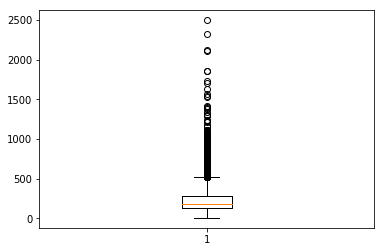

In [4]:
# Summarize review length
print("Review length: ")
result = [len(x) for x in X]
print("Mean %.2f words (%f)" % (np.mean(result), np.std(result)))
# plot review length
plt.boxplot(result)
plt.show()

In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
seed = 101
np.random.seed(seed)

In [6]:
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

In [7]:
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

In [8]:
# create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               4000250   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 251       
Total params: 4,160,501
Trainable params: 4,160,501
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
model.fit(X_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
25000/25000 [==============================] - 31s 1ms/step - loss: 0.5075 - acc: 0.7113
Epoch 2/5
25000/25000 [==============================] - 28s 1ms/step - loss: 0.1912 - acc: 0.9269
Epoch 3/5
25000/25000 [==============================] - 30s 1ms/step - loss: 0.0592 - acc: 0.9828
Epoch 4/5
25000/25000 [==============================] - 30s 1ms/step - loss: 0.0110 - acc: 0.9985
Epoch 5/5
25000/25000 [==============================] - 30s 1ms/step - loss: 0.0024 - acc: 0.9999


In [10]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, batch_size=128, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 86.54%


### Reducing number of epochs as the model is overfitting

In [11]:
# create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
flatten_2 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 250)               4000250   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 251       
Total params: 4,160,501
Trainable params: 4,160,501
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
model.fit(X_train, y_train, epochs = 2, batch_size=128)

Epoch 1/2
25000/25000 [==============================] - 31s 1ms/step - loss: 0.4619 - acc: 0.7535
Epoch 2/2
25000/25000 [==============================] - 30s 1ms/step - loss: 0.1712 - acc: 0.9358


In [13]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, batch_size=128, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 86.69%


This time, after the Embedding input layer, we insert a Conv1D layer. This convolutional layer has 32 feature maps and reads embedded word representations 3 vector elements of the word embedding at a time.The convolutional layer is followed by a 1D max pooling layer with a length and stride of 2 that halves the size of the feature maps from the convolutional layer. The rest of the network is the same as the neural network above.

In [14]:
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [15]:
# create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 250, 32)           0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 250)               2000250   
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 251       
Total params: 2,163,605
Trainable params: 2,163,605
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.fit(X_train, y_train, epochs = 2, batch_size=128)

Epoch 1/2
25000/25000 [==============================] - 33s 1ms/step - loss: 0.4414 - acc: 0.7651
Epoch 2/2
25000/25000 [==============================] - 33s 1ms/step - loss: 0.2132 - acc: 0.9159


In [17]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, batch_size=128,verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 88.38%


### Adding one hidden layer to the above model

In [18]:
# create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(125, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 250, 32)           0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 250)               2000250   
_________________________________________________________________
dense_8 (Dense)              (None, 125)               31375     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 126       
Total para

In [19]:
model.fit(X_train, y_train, epochs = 2, batch_size=128)

Epoch 1/2
25000/25000 [==============================] - 34s 1ms/step - loss: 0.4446 - acc: 0.7616
Epoch 2/2
25000/25000 [==============================] - 33s 1ms/step - loss: 0.2089 - acc: 0.9184


In [20]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, batch_size=128, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 88.37%


Since accuracy has dropped, removing hidden layer and proceeding 

### Increasing batch size to check if the accuracy is improving

In [21]:
# create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 250, 32)           0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 250)               2000250   
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 251       
Total params: 2,163,605
Trainable params: 2,163,605
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.fit(X_train, y_train, epochs = 2, batch_size=300)

Epoch 1/2
25000/25000 [==============================] - 26s 1ms/step - loss: 0.5365 - acc: 0.7090
Epoch 2/2
25000/25000 [==============================] - 26s 1ms/step - loss: 0.2425 - acc: 0.9040


In [23]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, batch_size=300, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 88.73%


#### Sticking to batch size 300 which is giving higher accuracy

In [24]:
# create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 250, 32)           0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 250)               2000250   
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 251       
Total params: 2,163,605
Trainable params: 2,163,605
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(X_train, y_train, epochs = 2, batch_size=300)

Epoch 1/2
25000/25000 [==============================] - 27s 1ms/step - loss: 0.6682 - acc: 0.5848
Epoch 2/2
25000/25000 [==============================] - 26s 1ms/step - loss: 0.2994 - acc: 0.8766


In [26]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, batch_size=300, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 88.50%
